In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from PIL import Image

def affine_solve(U, V):
    b = np.ravel(V, order='F')
    b = b.reshape((b.shape[0], 1))
    A = get_A_affine(U[:, 0], V[:, 0])
    for i in range(1, U.shape[1]):
        A = np.vstack((A, get_A_affine(U[:, i], V[:, i])))
    h = inv(A.T @ A) @ A.T @ b
    H = np.vstack((h[:3, :].T, h[3:6, :].T, [[0, 0, 1]]))
    return H
    
def get_A_homo(u, v):
    return np.array([[u[0], u[1], 1, 0, 0, 0, -u[0]*v[0], -u[1]*v[0]],\
                     [0, 0, 0, u[0], u[1], 1, -u[0]*v[1], -u[1]*v[1]]])
   
def get_A_affine(u, v):
    return np.array([[u[0], u[1], 1, 0, 0, 0],\
                     [0, 0, 0, u[0], u[1], 1]])

def homography_solve(U, V):
    b = np.ravel(V, order='F')
    b = b.reshape((b.shape[0], 1))
    A = get_A_homo(U[:, 0], V[:, 0])
    for i in range(1, U.shape[1]):
        A = np.vstack((A, get_A_homo(U[:, i], V[:, i])))
    h = inv(A.T @ A) @ A.T @ b
    H = np.vstack((h[:3, :].T, h[3:6, :].T, [[h[6, 0], h[7, 0], 1]]))
    return H

def from_3D_to_2D(V):
    N = V.shape[1]
    V = V @ inv(np.diag(V[2, 0:N]))
    return V[0:2, :]
     
def get_U_matrix(U):
    minx = min(U[0, :])
    maxx = max(U[0, :])
    miny = min(U[1, :])
    maxy = max(U[1, :])
    x_length = maxx-minx
    y_length = maxy-miny
    print(x_length)
    print(y_length)
    vx = np.arange(minx, maxx)
    print(vx)
    vy = np.arange(miny, maxy)
    print(vy)
    U_source = np.vstack((np.tile(vx, y_length), np.ravel(np.tile(vy, (x_length, 1)).T)))
    print(U_source)
    return U_source

def get_transform(U, V, transform):
    print(transform)
    U_source = get_U_matrix(U)
    if transform == 'affine':
        H = affine_solve(U, V)
    elif transform == 'homography':
        H = homography_solve(U, V)
    print(H)
    N = U_source.shape[1]
    U_source = np.vstack((U_source, np.ones((1, N))))
    V_target = H @ U_source
    V_target = from_3D_to_2D(V_target)
    V_target =  V_target.astype(int)
    if min(V_target[0,:]) < 0:
        V_target[0,:] = V_target[0,:] - min(V_target[0,:])
    if min(V_target[1,:]) < 0:
        V_target[1,:] = V_target[1,:] - min(V_target[1,:])
    print(V_target.shape)
    return V_target

def rectify(U, V, source_img, target_img, transform):
    minx = min(U[0, :])
    maxx = max(U[0, :])
    miny = min(U[1, :])
    maxy = max(U[1, :])
    print(minx, maxx, miny, maxy)
    x = maxx-minx
    y = maxy-miny
    
    V_target = get_transform(U, V, transform)

    #x_length = max(V_target[0,:])-min(V_target[0,:])
    #y_length = max(V_target[1,:])-min(V_target[1,:])

    #target_img = np.ones((y_length, x_length, source_img.shape[2]))*255
    #target_img = target_img.astype(int)
    U_source = get_U_matrix(U)
    print(U_source)
    print(U_source.shape)
    #print(V_target.shape)
    print(source_img.shape)
    print(target_img.shape)
    

    for i in range(U_source.shape[1]):
        #target_img[U_source[1, i], U_source[0, i], :] = source_img[U_source[1, i], U_source[0, i], :]
        #target_img[V_target[1, i], V_target[0, i], :] = source_img[U_source[1, i], U_source[0, i], :]
        if i%x != x-1 and int(i)//int(x) != y-1:
            j = i + x + 1
            x_inc = max(V_target[0, j], V_target[0, i+1]) - V_target[0, i]
            y_inc = max(V_target[1, j], V_target[1, i+x]) - V_target[1, i]
            for m in range(0, x_inc):
                for n in range(0, y_inc):
                    target_img[V_target[1, i]+n, V_target[0, i]+m, :] = source_img[U_source[1, i], U_source[0, i], :]
                    
    return target_img

def show_img(file, rotation = 0, size = None):
    #img = mpimg.imread(file)
    img = Image.open(file)
    if size != None:
        img.thumbnail((size, size), Image.ANTIALIAS) # resizes image in-place
    img = ndimage.rotate(img, rotation)
    #imgplot = plt.imshow(img)
    #plt.show()
    return img

(540, 540, 3)
126 180 41 159
affine
54
118
[126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
[ 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158]
[[126 127 128 ..., 177 178 179]
 [ 41  41  41 ..., 158 158 158]]
[[  3.83167512e+00  -3.84731050e-01  -4.72766875e+02]
 [ -9.02091672e-01   1.23379170e+00   7.49622355e+01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
(2, 6372)
54
118
[126 127 128

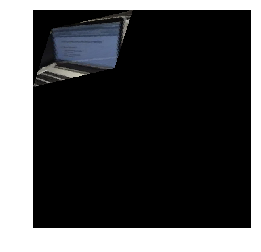

In [8]:
from PIL import Image

im = Image.open("images/computer_screen.png")
rgb_im = im.convert('RGB')
rgb_im.save('images/computer_screen.jpg')

U = np.array([[684, 900, 862, 634], [546, 799, 299, 205]])//5
V = np.array([[0, 160, 160, 0], [100, 100, 0, 0]])

source_img = show_img('images/computer_screen.jpg', 0)
x_length = source_img.shape[1]
source_img = show_img('images/computer_screen.jpg', 0, x_length//5)

target_img = Image.new('RGB', (x_length//3, x_length//3))
target_img = ndimage.rotate(target_img, 0)
print(target_img.shape)
target_img = rectify(U, V, source_img, target_img, transform='affine')

fig, ax = plt.subplots()
plt.imshow(target_img)
plt.axis('off')
#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('images/rectify_1.jpg', format='jpg')
plt.show()

(1106, 1106, 3)
35 289 312 339
affine
254
27
[ 35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 2

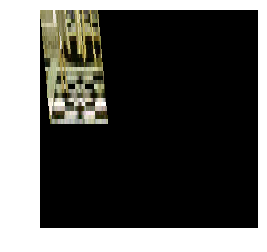

In [9]:
U = np.array([[71, 579, 566, 269], [679, 679, 624, 624]])//2
V = np.array([[0, 500, 500, 0], [1200, 1200, 0, 0]])//2

source_img = show_img('images/the_flagellation.jpg', 0)
x_length = source_img.shape[1]
source_img = show_img('images/the_flagellation.jpg', 0, x_length//2)

target_img = Image.new('RGB', (x_length, x_length))
target_img = ndimage.rotate(target_img, 0)
print(target_img.shape)
target_img = rectify(U, V, source_img, target_img, transform='affine')

fig, ax = plt.subplots()
plt.imshow(target_img)
plt.axis('off')
#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('images/flag_affine.jpg', format='jpg')
plt.show()